In [1]:
import nltk
from nltk.corpus import cess_esp
corpus_sentences = cess_esp.tagged_sents()
#Transformamos el corpus para reducir categorias como en la practica 2
corpus_transformado = []
corpus_original = []
for sentence in corpus_sentences:
    sentence_aux = []
    for word, label in sentence:
        if(word != "*0*"):
            if(label.startswith("v") or label.startswith("F")):
                sentence_aux.append((word, label[0:3]))
            else:
                sentence_aux.append((word, label[0:2]))
    corpus_transformado.append(sentence_aux) 

In [2]:

from random import shuffle 
corpus_barajado = corpus_transformado
shuffle(corpus_barajado)
longitud_particion = len(corpus_transformado)//10
from nltk import hmm
precisionesHMMBarajado = []
for i in range(1,10):
    tagger_hmm = hmm.HiddenMarkovModelTagger.train(corpus_barajado[0:i*longitud_particion])
    precisionesHMMBarajado.append(tagger_hmm.evaluate(corpus_barajado[9*longitud_particion:]))
palabrasTest = 0
for sentence in corpus_barajado[9*longitud_particion:]:
    for word in sentence:
        palabrasTest += 1   
print(precisionesHMMBarajado)    

[0.8388880196109112, 0.8725812340270171, 0.8893756845564075, 0.8980858498930788, 0.9058050383351588, 0.9123246231679967, 0.9169665675689772, 0.9207218484326918, 0.9244249726177437]


Precisión e intervalos de confianza para HMM con validación cruzada barajado con categorias reducidas


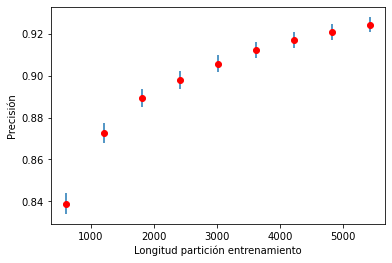

[0.8388880196109112, 0.8725812340270171, 0.8893756845564075, 0.8980858498930788, 0.9058050383351588, 0.9123246231679967, 0.9169665675689772, 0.9207218484326918, 0.9244249726177437]
[0.005203876117988665, 0.0047198768462755, 0.00443995899469249, 0.004282399756307457, 0.004134683186921198, 0.004003359156093221, 0.003905838496941841, 0.003824300563957961, 0.003741416234472441]


In [3]:
#Calculamos los intervalos de confianza y representamos los resultados HMM 
from math import sqrt 
import matplotlib.pyplot as plt
columnas = [603, 1206, 1809, 2412, 3015, 3618 ,4221 ,4824 ,5427]
intervaloHMM = [] 
for precision in precisionesHMMBarajado: 
    s = sqrt(precision*(1-precision)/palabrasTest) 
    r = 1.96*s 
    intervaloHMM.append(r) 
print("Precisión e intervalos de confianza para HMM con validación cruzada barajado con categorias reducidas")
plt.plot(columnas, precisionesHMMBarajado, 'ro')
plt.errorbar(columnas, precisionesHMMBarajado, yerr=intervaloHMM,linestyle='None');
plt.ylabel('Precisión')
plt.xlabel('Longitud partición entrenamiento')
plt.show()
print(precisionesHMMBarajado)
print(intervaloHMM)